## *__SIMPLE LINEAR REGRESION__*

In [1]:
## First we inport the require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
## Importing the data for the analysis into python
dadaba = pd.read_csv('CanadaFuelCon.csv')

In [3]:
## Verifying the importation of our data
dadaba.head()

,ModelYear,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,FuelType,ConsumptionCity,ConsumptionHwy,ConsumptionComb,Consumption,CO2Emissions,CO2Rating,SmogRating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

In [4]:
dadaba.dtypes

ModelYear            int64
Make                object
Model               object
Vehicle Class       object
Engine Size        float64
Cylinders            int64
Transmission        object
FuelType            object
ConsumptionCity    float64
ConsumptionHwy     float64
ConsumptionComb    float64
Consumption          int64
CO2Emissions         int64
CO2Rating            int64
SmogRating           int64
dtype: object

In [5]:
dadaba.columns

Index(['ModelYear', 'Make', 'Model', 'Vehicle Class', 'Engine Size',
       'Cylinders', 'Transmission', 'FuelType', 'ConsumptionCity',
       'ConsumptionHwy', 'ConsumptionComb', 'Consumption', 'CO2Emissions',
       'CO2Rating', 'SmogRating'],
      dtype='object')

* MODELYEAR e.g. 2014
* MAKE e.g. Acura
* MODEL e.g. ILX
* VEHICLE CLASS e.g. SUV
* ENGINE SIZE e.g. 4.7
* CYLINDERS e.g 6
* TRANSMISSION e.g. A6
* FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
* FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
* CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [6]:
dadaba.info

<bound method DataFrame.info of      ModelYear   Make              Model  Vehicle Class  Engine Size  \
0         2023  Acura            Integra      Full-size          1.5   
1         2023  Acura     Integra A-SPEC      Full-size          1.5   
2         2023  Acura     Integra A-SPEC      Full-size          1.5   
3         2023  Acura         MDX SH-AWD     SUV: Small          3.5   
4         2023  Acura  MDX SH-AWD Type S  SUV: Standard          3.0   
..         ...    ...                ...            ...          ...   
818       2023  Volvo        XC40 B5 AWD     SUV: Small          2.0   
819       2023  Volvo        XC60 B5 AWD     SUV: Small          2.0   
820       2023  Volvo        XC60 B6 AWD     SUV: Small          2.0   
821       2023  Volvo        XC90 B5 AWD  SUV: Standard          2.0   
822       2023  Volvo        XC90 B6 AWD  SUV: Standard          2.0   

     Cylinders Transmission FuelType  ConsumptionCity  ConsumptionHwy  \
0            4          AV7   

In [7]:
## Checking the missing values in the dataset
dadaba.isnull().sum()

ModelYear          0
Make               0
Model              0
Vehicle Class      0
Engine Size        0
Cylinders          0
Transmission       0
FuelType           0
ConsumptionCity    0
ConsumptionHwy     0
ConsumptionComb    0
Consumption        0
CO2Emissions       0
CO2Rating          0
SmogRating         0
dtype: int64

<Axes: xlabel='Make', ylabel='CO2Emissions'>

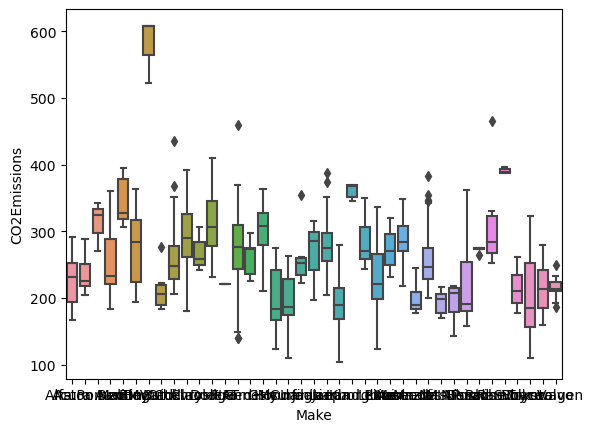

In [8]:
sn.boxplot(x = 'Make', y = 'CO2Emissions', data = dadaba)

<Axes: xlabel='FuelType', ylabel='CO2Emissions'>

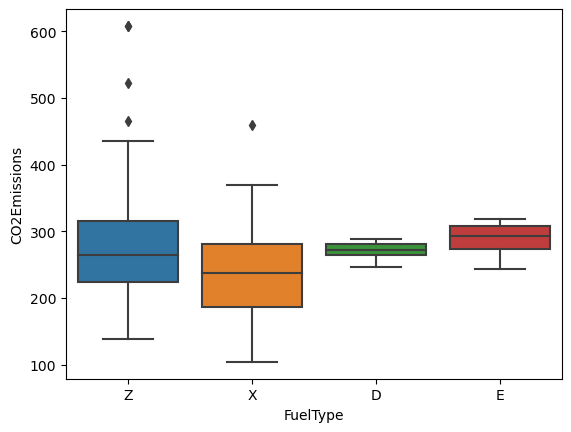

In [9]:
sn.boxplot(x = 'FuelType', y = 'CO2Emissions', data = dadaba)

The plot reveals the presence of outliers in fuel type Z and X the data, which have significantly skewed the carbon dioxide emission values in the vehicle class. Additionally, the plot illustrates variations in carbon dioxide emissions across different Fuel Type.

<Axes: xlabel='Transmission', ylabel='CO2Emissions'>

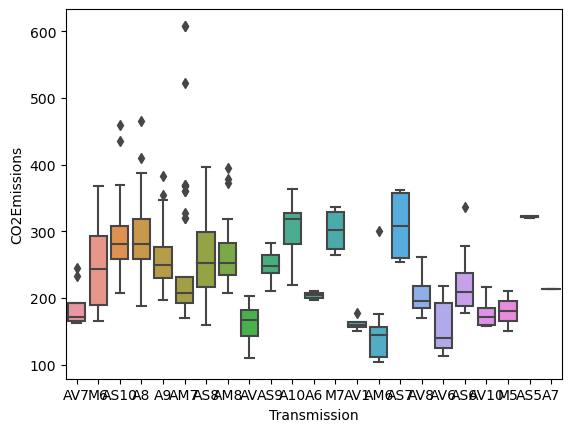

In [10]:
sn.boxplot(x = 'Transmission', y = 'CO2Emissions', data = dadaba)

<Axes: xlabel='Vehicle Class', ylabel='CO2Emissions'>

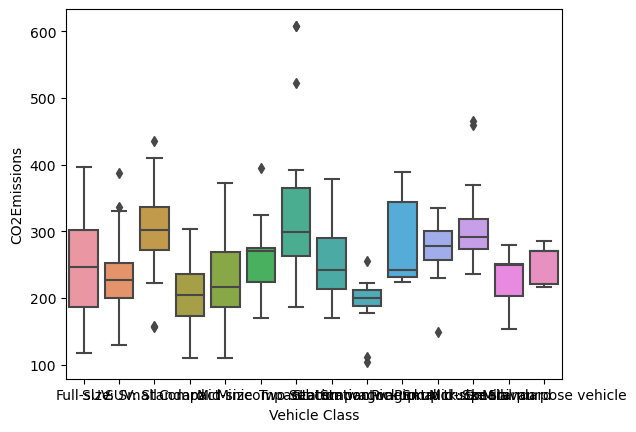

In [11]:
sn.boxplot(x = 'Vehicle Class', y = 'CO2Emissions', data = dadaba)

The plot reveals the presence of outliers within the data, which have significantly skewed the carbon dioxide emission values in the vehicle class. Additionally, the plot illustrates variations in carbon dioxide emissions across different vehicle classes.

In [12]:
## Seleting the numerical variables from the data and rename it 
FuelCon = dadaba.select_dtypes(include=np.number)

In [13]:
FuelCon

,ModelYear,Engine Size,Cylinders,ConsumptionCity,ConsumptionHwy,ConsumptionComb,Consumption,CO2Emissions,CO2Rating,SmogRating
0,2023,1.5,4,7.9,6.3,7.2,39,167,6,7
1,2023,1.5,4,8.1,6.5,7.4,38,172,6,7
2,2023,1.5,4,8.9,6.5,7.8,36,181,6,6
3,2023,3.5,6,12.6,9.4,11.2,25,263,4,5
4,2023,3.0,6,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...
818,2023,2.0,4,10.2,7.9,9.2,31,215,5,5
819,2023,2.0,4,10.3,8.2,9.4,30,218,5,5
820,2023,2.0,4,11.1,8.7,10.0,28,233,5,7
821,2023,2.0,4,10.5,8.4,9.6,29,223,5,5


In [14]:
vis = FuelCon[['Engine Size', 'CO2Emissions', 'Consumption', 'ConsumptionCity']]

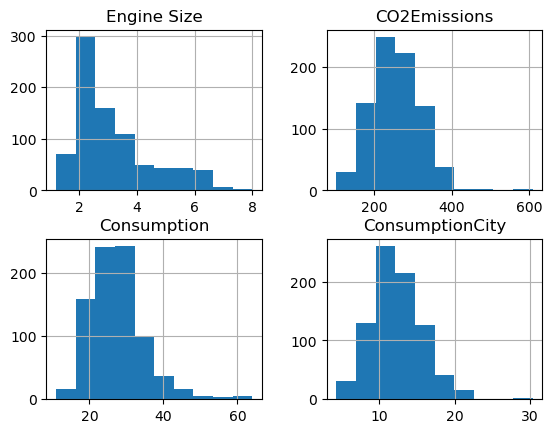

In [15]:
## Looking at the distribution of the variables
vis.hist()
plt.show()

<Axes: xlabel='Consumption', ylabel='CO2Emissions'>

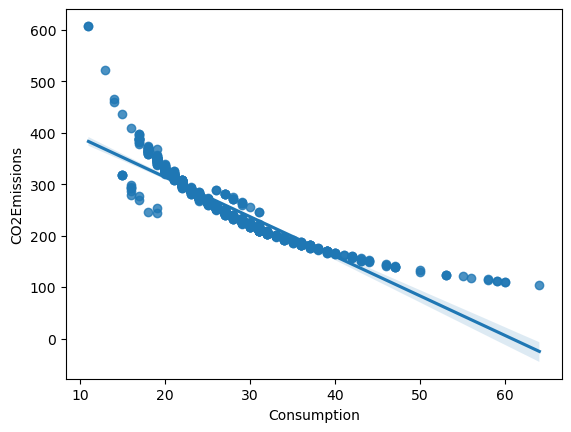

In [16]:
sn.regplot(x='Consumption', y='CO2Emissions', data=FuelCon)

The graphical representation provides clear evidence of a strong and inverse relationship between Consumption and CO2 Emissions. As Consumption increases, there is a noticeable decrease in CO2 Emissions. This suggests that vehicles with higher fuel efficiency, as indicated by lower consumption rates, tend to produce lower levels of carbon dioxide emissions. The correlation between these two variables is evident from the consistent downward trend visible in the plot, reinforcing the notion that more fuel-efficient vehicles contribute to reduced carbon footprint

In [17]:
FuelCon.describe()

,ModelYear,Engine Size,Cylinders,ConsumptionCity,ConsumptionHwy,ConsumptionComb,Consumption,CO2Emissions,CO2Rating,SmogRating
count,823.0,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,2023.0,3.139976,5.603888,12.379830,9.324666,11.005832,27.460510,256.453220,4.540705,5.243013
std,0.0,1.354157,1.954117,3.420741,2.273932,2.847258,7.549711,63.412909,1.266442,1.668878
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,2023.0,3.600000,6.000000,14.600000,10.650000,12.800000,31.000000,298.000000,5.000000,7.000000
max,2023.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


Engine Size: The engine size has a mean value of approximately 3.14 with a standard deviation of about 1.35. The minimum engine size is 1.2, and the maximum engine size is 8.0.

Cylinders: The number of cylinders in the vehicles has a mean of around 5.60 with a standard deviation of approximately 1.95. The minimum and maximum number of cylinders are 3 and 16, respectively.

ConsumptionCity: The mean fuel consumption in the city is approximately 12.38 liters per 100 kilometers. The standard deviation is about 3.42, and the minimum and maximum city consumption values are 4.4 and 30.3 liters per 100 kilometers, respectively.

ConsumptionHwy: The mean fuel consumption on the highway is around 9.32 liters per 100 kilometers. The standard deviation is about 2.27, and the minimum and maximum highway consumption values are 4.4 and 20.9 liters per 100 kilometers, respectively.

ConsumptionComb: The mean combined fuel consumption is approximately 11.01 liters per 100 kilometers. The standard deviation is about 2.85, and the minimum and maximum combined consumption values are 4.4 and 26.1 liters per 100 kilometers, respectively.

Consumption: The mean overall fuel consumption is approximately 27.46 miles per gallon (MPG). The standard deviation is about 7.55, and the minimum and maximum overall consumption values are 11.0 and 64.0 MPG, respectively.

CO2Emissions: The mean CO2 emissions are approximately 256.45 grams per kilometer. The standard deviation is about 63.41, and the minimum and maximum CO2 emissions values are 104.0 and 608.0 grams per kilometer, respectively.

CO2Rating: The mean CO2 rating is about 4.54, with a standard deviation of approximately 1.27. The minimum and maximum CO2 rating values are 1.0 and 9.0, respectively.

SmogRating: The mean smog rating is approximately 5.24, with a standard deviation of about 1.67. The minimum and maximum smog rating values are 1.0 and 8.0, respectively.

In [18]:
FuelCon.drop(columns='ModelYear').describe()

,Engine Size,Cylinders,ConsumptionCity,ConsumptionHwy,ConsumptionComb,Consumption,CO2Emissions,CO2Rating,SmogRating
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,3.139976,5.603888,12.379830,9.324666,11.005832,27.460510,256.453220,4.540705,5.243013
std,1.354157,1.954117,3.420741,2.273932,2.847258,7.549711,63.412909,1.266442,1.668878
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.650000,12.800000,31.000000,298.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


<Axes: xlabel='Engine Size', ylabel='CO2Emissions'>

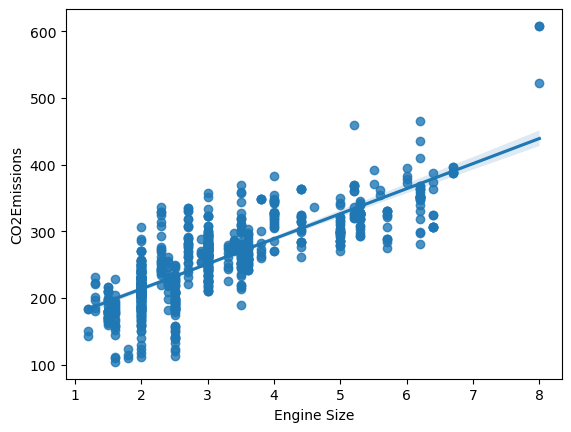

In [19]:
## Explore the relationship between Engine Size and CO2 Emissions
sn.regplot(x='Engine Size', y='CO2Emissions', data=FuelCon)

This indicates that there exists a direct relationship between the size of the engine and the emission of carbon dioxide into the atmosphere. As the engine size of vehicles increases, the plot demonstrates a corresponding upward trend in CO2 Emissions. This alignment of data points points to the fact that larger engines tend to produce higher levels of carbon dioxide, contributing to environmental concerns related to greenhouse gas emissions. This insight underscores the significance of considering engine size as a contributing factor to carbon emissions when assessing the environmental impact of vehicles.

In [20]:
## Looking at the correlation between the variables 
correlation=FuelCon.drop(columns='ModelYear').corr()
correlation

,Engine Size,Cylinders,ConsumptionCity,ConsumptionHwy,ConsumptionComb,Consumption,CO2Emissions,CO2Rating,SmogRating
Engine Size,1.000000,0.917510,0.828310,0.720142,0.805750,-0.696698,0.802549,-0.753203,-0.554944
Cylinders,0.917510,1.000000,0.837141,0.713644,0.809161,-0.691176,0.815319,-0.757880,-0.596032
ConsumptionCity,0.828310,0.837141,1.000000,0.913973,0.989133,-0.918761,0.957434,-0.918305,-0.578048
ConsumptionHwy,0.720142,0.713644,0.913973,1.000000,0.963470,-0.878692,0.925540,-0.886016,-0.434450
ConsumptionComb,0.805750,0.809161,0.989133,0.963470,1.000000,-0.922886,0.965236,-0.925256,-0.537791
Consumption,-0.696698,-0.691176,-0.918761,-0.878692,-0.922886,1.000000,-0.917465,0.930619,0.509316
CO2Emissions,0.802549,0.815319,0.957434,0.925540,0.965236,-0.917465,1.000000,-0.958794,-0.579746
CO2Rating,-0.753203,-0.757880,-0.918305,-0.886016,-0.925256,0.930619,-0.958794,1.000000,0.557096
SmogRating,-0.554944,-0.596032,-0.578048,-0.434450,-0.537791,0.509316,-0.579746,0.557096,1.000000


Engine Size: It has a strong positive correlation with Cylinders (0.917510), ConsumptionCity (0.828310), ConsumptionHwy (0.720142), ConsumptionComb (0.805750), and CO2Emissions (0.802549). This means that as the engine size increases, these attributes tend to increase as well.

Cylinders: Similar to Engine Size, it has strong positive correlations with ConsumptionCity (0.837141), ConsumptionHwy (0.713644), ConsumptionComb (0.809161), and CO2Emissions (0.815319).

ConsumptionCity: It has a strong positive correlation with ConsumptionHwy (0.913973), ConsumptionComb (0.989133), and CO2Emissions (0.957434). This suggests that as fuel consumption in the city increases, fuel consumption on the highway and overall fuel consumption also tend to increase.

ConsumptionHwy: It has a strong positive correlation with ConsumptionComb (0.963470) and a moderate positive correlation with CO2Emissions (0.925540).

ConsumptionComb: It has a strong positive correlation with CO2Emissions (0.965236). This makes sense as the combined fuel consumption includes both city and highway driving, which directly impacts CO2 emissions.

Consumption: It has a strong negative correlation with all other attributes: Engine Size, Cylinders, ConsumptionCity, ConsumptionHwy, ConsumptionComb, and CO2Emissions. This implies that higher fuel consumption results in lower fuel efficiency and higher CO2 emissions.

CO2Emissions: It has a strong positive correlation with ConsumptionCity (0.917465), ConsumptionHwy (0.878692), and ConsumptionComb (0.922886). CO2 emissions are directly related to fuel consumption.

CO2Rating: It has a strong negative correlation with all consumption-related attributes (ConsumptionCity, ConsumptionHwy, ConsumptionComb, and Consumption) and a moderate negative correlation with Engine Size and Cylinders. A higher CO2Rating indicates lower CO2 emissions and better environmental performance.

SmogRating: It has a moderate negative correlation with all consumption-related attributes (ConsumptionCity, ConsumptionHwy, ConsumptionComb, and Consumption) and a weak negative correlation with Cylinders. A higher SmogRating indicates better performance in terms of reducing air pollutants.

<Axes: >

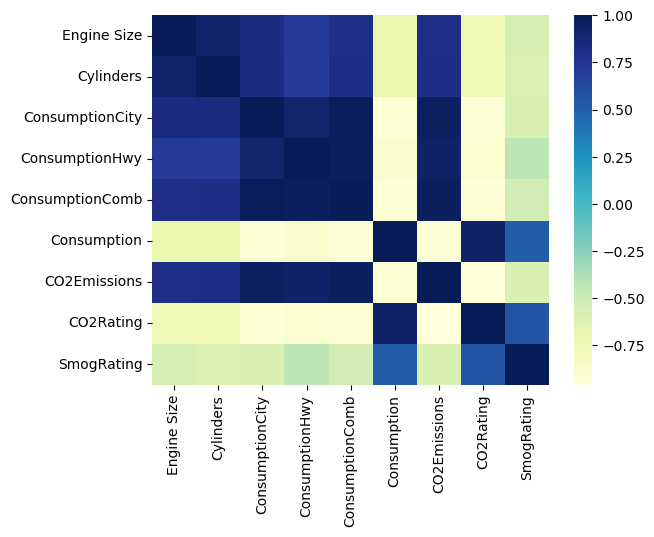

In [21]:
## Using heatmap to view the correlation between the variables
sn.heatmap(correlation, cmap = 'YlGnBu')

<Axes: >

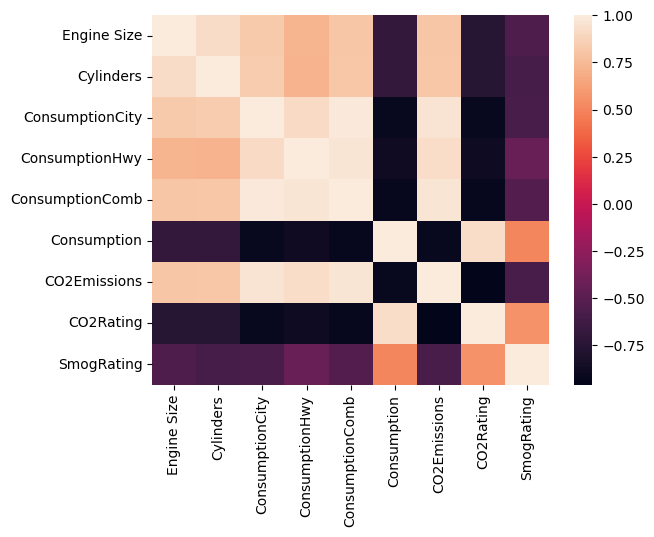

In [22]:
## Using heatmap to view the correlation between the variables
sn.heatmap(correlation)

In [23]:
## Investigating the relationship between engine size and CO2 emission
FuelCon[['Engine Size', 'CO2Emissions']].corr()

,Engine Size,CO2Emissions
Engine Size,1.000000,0.802549
CO2Emissions,0.802549,1.000000


<Axes: >

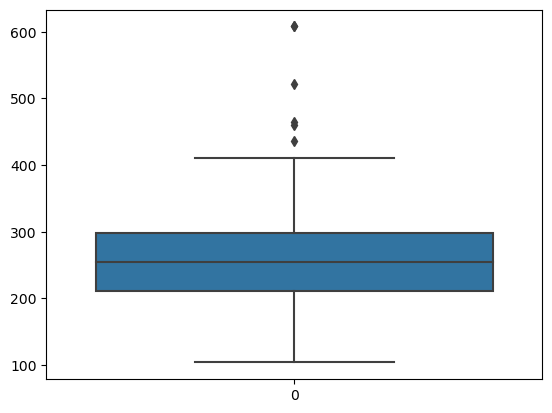

In [24]:
## Checking the presence of outlier in the  CO2 Emission
sn.boxplot(FuelCon['CO2Emissions'])

The plot visually identifies the presence of outliers within the CO2 Emission observation. These outliers represent data points that deviate significantly from the overall pattern observed in the plot. They appear as distinct and distant points from the main cluster of data. The existence of these outliers suggests the presence of exceptional cases or instances where CO2 emissions greatly differ from the norm.

<Axes: >

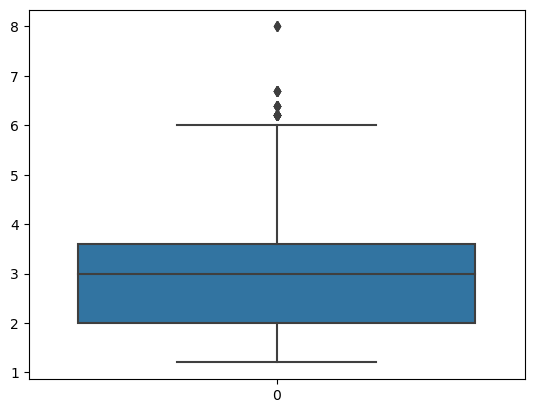

In [25]:
## Checking the present of outliers in the engine size 
sn.boxplot(FuelCon['Engine Size'])

The plot reveals the existence of outliers within the Engine Size data. These outliers stand out as data points that significantly deviate from the general trend observed in the plot. They appear as isolated or distant values from the main cluster of data points. The presence of these outliers indicates instances where the engine size differs significantly from the majority of cases. These outliers could potentially hold valuable information or represent unique scenarios that warrant further investigation

In [26]:
## Now we split the data into train and test data using roundom selection
cut = np.random.rand(len(FuelCon)) < 0.8
train = FuelCon[cut]
test = FuelCon[~cut]

In [27]:
## Checking the plit for test
test

,ModelYear,Engine Size,Cylinders,ConsumptionCity,ConsumptionHwy,ConsumptionComb,Consumption,CO2Emissions,CO2Rating,SmogRating
5,2023,2.0,4,11.0,8.6,9.9,29,232,5,6
18,2023,5.2,12,16.4,10.7,13.8,20,324,3,3
20,2023,4.0,8,16.8,11.9,14.6,19,343,3,5
33,2023,3.0,6,11.1,7.8,9.6,29,224,5,5
34,2023,3.0,6,12.5,8.3,10.6,27,247,5,5
...,...,...,...,...,...,...,...,...,...,...
790,2023,3.4,6,12.9,11.6,12.3,23,287,4,5
795,2023,2.0,4,11.0,9.6,10.3,27,243,5,3
806,2023,2.0,4,9.1,6.4,7.9,36,186,6,7
819,2023,2.0,4,10.3,8.2,9.4,30,218,5,5


In [28]:
## Checking the plit for trian
train

,ModelYear,Engine Size,Cylinders,ConsumptionCity,ConsumptionHwy,ConsumptionComb,Consumption,CO2Emissions,CO2Rating,SmogRating
0,2023,1.5,4,7.9,6.3,7.2,39,167,6,7
1,2023,1.5,4,8.1,6.5,7.4,38,172,6,7
2,2023,1.5,4,8.9,6.5,7.8,36,181,6,6
3,2023,3.5,6,12.6,9.4,11.2,25,263,4,5
4,2023,3.0,6,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...
816,2023,2.0,4,10.9,8.3,9.7,29,227,5,7
817,2023,2.0,4,10.0,7.6,8.9,32,208,5,5
818,2023,2.0,4,10.2,7.9,9.2,31,215,5,5
820,2023,2.0,4,11.1,8.7,10.0,28,233,5,7


In [29]:
x_train = np.asanyarray(train[['Engine Size']])
y_train = np.asanyarray(train[['CO2Emissions']])
y_test = np.asanyarray(test[['CO2Emissions']])
x_test = np.asanyarray(test[['Engine Size']])

In [30]:
x_train

array([[1.5],
       [1.5],
       [1.5],
       [3.5],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [2. ],
       [2. ],
       [2.9],
       [2. ],
       [2. ],
       [2.9],
       [2. ],
       [4. ],
       [5.2],
       [4. ],
       [4. ],
       [5.2],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [5.2],
       [5.2],
       [5.2],
       [5.2],
       [2.9],
       [2.9],
       [4. ],
       [4. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [2.9],
       [2.9],
       [3. ],
       [4. ],
       [4. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [4. ],
       [6. ],
       [6. ],
       [6. ],
       [4. ],
       [6. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
      

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(x_train, y_train)

LinearRegression()

In [35]:
lm.coef_

array([[38.66300823]])

Linear regression, the coefficient 37.349 represents the change in the CO2 Emission for each unit change in the Engine Size. This coefficient tells us how the CO2 Emission is affected by changes in the Engine Size.

In [36]:
lm.intercept_

array([133.69643689])

linear regression, the intercept represents the value of the CO2 Emisssion when all the independent variables (Engine size) is set to zero. It is the value on the y-axis where the regression line crosses the vertical axis (x = 0)

In [37]:
yhat = lm.predict(x_test)
yhat

array([[211.02245334],
       [334.74407967],
       [288.3484698 ],
       [249.68546157],
       [249.68546157],
       [211.02245334],
       [334.74407967],
       [288.3484698 ],
       [288.3484698 ],
       [249.68546157],
       [288.3484698 ],
       [288.3484698 ],
       [249.68546157],
       [249.68546157],
       [303.81367309],
       [303.81367309],
       [249.68546157],
       [249.68546157],
       [249.68546157],
       [303.81367309],
       [303.81367309],
       [180.09204676],
       [183.95834758],
       [238.0865591 ],
       [272.88326651],
       [249.68546157],
       [249.68546157],
       [373.4070879 ],
       [191.69094923],
       [238.0865591 ],
       [249.68546157],
       [338.61038049],
       [338.61038049],
       [338.61038049],
       [238.0865591 ],
       [338.61038049],
       [338.61038049],
       [373.4070879 ],
       [249.68546157],
       [272.88326651],
       [272.88326651],
       [381.13968954],
       [381.13968954],
       [373

C:\Users\DaDaBa\AppData\Local\Temp\ipykernel_8724\4263574727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sn.distplot(y_test, hist = False, color = 'r', label = "Actual Vlues")
C:\Users\DaDaBa\AppData\Local\Temp\ipykernel_8724\4263574727.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

Text(0.5, 1.0, 'Actual value vs Fitted value')

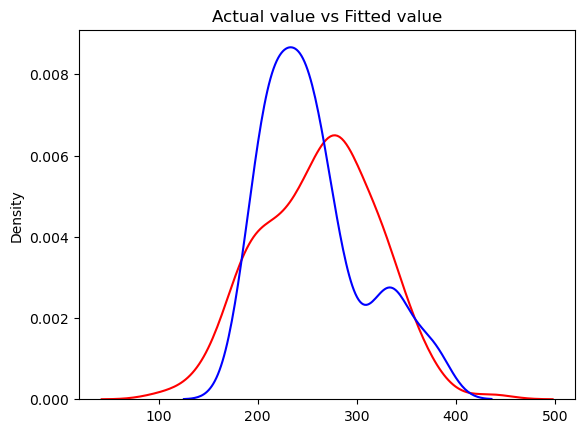

In [38]:
ax1 = sn.distplot(y_test, hist = False, color = 'r', label = "Actual Vlues")
sn.distplot(yhat, hist=False, color="b", label="Fitted", ax = ax1)
plt.title("Actual value vs Fitted value")

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, yhat)

0.5540438404109408

In [41]:
import statsmodels.api as sm

In [42]:
# Add a constant to predictor variables
x_train_with_constant = sm.add_constant(x_train)
x_test_with_constant = sm.add_constant(x_test)

# Fit the linear regression model
model = sm.OLS(y_train, x_train_with_constant).fit()

# Get the model summary
summary = model.summary()

# Print the model summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1259.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          7.46e-154
Time:                        15:43:21   Log-Likelihood:                -3271.8
No. Observations:                 648   AIC:                             6548.
Df Residuals:                     646   BIC:                             6556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6964      3.721     35.930      0.0

R-squared and Adjusted R-squared: The R-squared value of 0.661 indicates that approximately 66.1% of the variability in the dependent variable (y) can be explained by the independent variable(s) included in the model. The adjusted R-squared, which takes into account the number of predictors, is also close at 0.660.

F-statistic and Prob (F-statistic): The F-statistic of 1259.0 is highly significant with a very low p-value (7.46e-154). This suggests that at least one of the independent variables has a significant effect on the dependent variable.

Coefficients: The regression equation is presented as:

y = 133.6964 + 38.6630 * x1

The constant (intercept) is 133.6964. This is the expected value of y when all independent variables are zero.
The coefficient of x1 is 38.6630. For each unit increase in x1, y is expected to increase by 38.6630 units.
P-values: Both the constant and the coefficient for x1 have extremely low p-values (< 0.0001), indicating that both of these coefficients are statistically significant. This suggests that the relationship between the independent variable x1 and the dependent variable y is unlikely to be due to random chance.

Log-Likelihood, AIC, and BIC: These metrics help in comparing the goodness of fit of different models. Lower AIC and BIC values generally indicate a better-fitting model. The log-likelihood is -3271.8, resulting in AIC of 6548.0 and BIC of 6556.0.

Residual Diagnostics:

Omnibus Test: The low p-value (< 0.0001) suggests that the residuals may not be normally distributed.
Durbin-Watson Test: A value of 0.993 suggests that there is likely no significant autocorrelation in the residuals.
Jarque-Bera Test: The low p-value (< 0.0001) indicates that the residuals do not follow a normal distribution.
Skewness and Kurtosis: Skewness is 0.271, indicating a slight rightward skew, and kurtosis is 4.576, indicating slightly heavy tails compared to a normal distribution.
Condition Number: The condition number of 9.19 is relatively low, indicating no severe multicollinearity concerns.

## Multiple Linear Regression

In [43]:
## Selaecting the predictor variables
xm_train = train[['Engine Size', 'Cylinders', 'SmogRating', 'ConsumptionCity', 'ConsumptionHwy', 'ConsumptionComb', 'Consumption']]
xm_test = test[['Engine Size', 'Cylinders', 'SmogRating', 'ConsumptionCity', 'ConsumptionHwy', 'ConsumptionComb', 'Consumption']]

In [44]:
lm1=LinearRegression()

In [45]:
lm1.fit(xm_train, y_train)

LinearRegression()

In [46]:
pd.DataFrame(lm1.coef_)

,0,1,2,3,4,5,6
0,0.268415,3.9548,-2.208204,3.159534,6.966972,5.976377,-1.569826


In [47]:
xm_train_with_constant = sm.add_constant(xm_train)
xm_test_with_constant = sm.add_constant(xm_test)

# Fit the linear regression model
model_m = sm.OLS(y_train, xm_train_with_constant).fit()

# Get the model summary
summary = model_m.summary()

# Print the model summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2050.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:45:36   Log-Likelihood:                -2600.4
No. Observations:                 648   AIC:                             5217.
Df Residuals:                     640   BIC:                             5253.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             118.5874     10.851     

R-squared and Adjusted R-squared: The R-squared value of 0.957 suggests that approximately 95.7% of the variability in the dependent variable (y) can be explained by the independent variables included in the model. The adjusted R-squared, which takes into account the number of predictors, is also high at 0.957. This indicates that the model fits the data very well.

F-statistic and Prob (F-statistic): The F-statistic of 2050.0 is highly significant with a p-value of 0.00. This indicates that at least one of the independent variables in the model has a significant effect on the dependent variable.

Coefficients: The regression equation includes multiple coefficients:

The constant (intercept) is 118.5874. This represents the expected value of y when all independent variables are zero.
The coefficients for the independent variables:
Engine Size: 0.2684
Cylinders: 3.9548
SmogRating: -2.2082
ConsumptionCity: 3.1595
ConsumptionHwy: 6.9670
ConsumptionComb: 5.9764
Consumption: -1.5698
These coefficients represent the change in the dependent variable (y) associated with a one-unit change in each respective independent variable, while keeping other variables constant.

P-values: Several independent variables have low p-values (close to zero), indicating their statistical significance. These variables are Cylinders, SmogRating, and Consumption.

Log-Likelihood, AIC, and BIC: The log-likelihood is -2600.4, leading to an AIC of 5217.0 and BIC of 5253.0. Lower AIC and BIC values suggest a better-fitting model.

Residual Diagnostics:

Omnibus Test: The very low p-value (< 0.0001) indicates that the residuals do not follow a normal distribution.
Durbin-Watson Test: A value of 1.751 suggests some positive autocorrelation.
Jarque-Bera Test: The low p-value (< 0.0001) suggests that the residuals do not follow a normal distribution.
Skewness and Kurtosis: A negative skewness value of -4.432 and a high kurtosis of 35.076 suggest significant departure from normality.
Condition Number: The condition number of 1160 indicates that there might be some multicollinearity present among the independent variables.

In [51]:
## since the data was not normalize at first we normalize it a fit a new model 
X = FuelCon[['Engine Size', 'Cylinders', 'SmogRating', 'ConsumptionCity', 'ConsumptionHwy', 'ConsumptionComb', 'Consumption']]
Y =FuelCon['CO2Emissions']

In [57]:
## normAalize the predictor variables using the sklearn standard scale
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [58]:
## splitting after normalization 
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, ys_train, ys_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [63]:
# Fit Regression model
xs_train_with_constant = sm.add_constant(Xs_train)
xs_test_with_constant = sm.add_constant(Xs_test)
model_s = sm.OLS(ys_train, xs_train_with_constant).fit()

# Get coefficient estimates
coefficients = model_s.params

# Print the coefficients
print(coefficients)

const    256.092915
x1         0.129120
x2         9.754900
x3        -4.951866
x4         3.338549
x5        13.263997
x6        18.779554
x7       -16.408068
dtype: float64


In [62]:
print(model_s.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2Emissions   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1499.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:24:32   Log-Likelihood:                -2726.3
No. Observations:                 658   AIC:                             5469.
Df Residuals:                     650   BIC:                             5505.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.0929      0.599    427.824      0.0

R-squared and Adjusted R-squared: The R-squared value of 0.942 indicates that approximately 94.2% of the variability in the dependent variable (CO2Emissions) can be explained by the independent variables included in the model. The adjusted R-squared, which accounts for the number of predictors, is also high at 0.941. This indicates that the model is a good fit for the data.

F-statistic and Prob (F-statistic): The F-statistic of 1499.0 is highly significant with a p-value of 0.00. This suggests that at least one of the independent variables in the model has a significant effect on the dependent variable.

Coefficients: The regression equation includes multiple coefficients:

The constant (intercept) is 256.0929. This represents the expected value of CO2Emissions when all independent variables are zero.

The coefficients for the independent variables:
x1: 0.1291
x2: 9.7549
x3: -4.9519
x4: 3.3385
x5: 13.2640
x6: 18.7796
x7: -16.4081

These coefficients represent the change in CO2Emissions associated with a one-unit change in each respective independent variable, while keeping other variables constant.

P-values: Several independent variables have low p-values, indicating their statistical significance. These variables are x2, x3, and x7.

Log-Likelihood, AIC, and BIC: The log-likelihood is -2726.3, leading to an AIC of 5469.0 and BIC of 5505.0. Lower AIC and BIC values suggest a better-fitting model.


*Residual Diagnostics*

Omnibus Test: The very low p-value (< 0.0001) indicates that the residuals do not follow a normal distribution.

Durbin-Watson Test: A value of 1.981 suggests some positive autocorrelation.

Jarque-Bera Test: The low p-value (< 0.0001) suggests that the residuals do not follow a normal distribution.

Skewness and Kurtosis: A negative skewness value of -3.131 and high kurtosis of 21.586 suggest significant deviations from normality.

Condition Number: The condition number of 226 indicates that multicollinearity may not be a significant concern among the independent variables.

In [58]:
lm1.intercept_

array([149.14498883])

The linear regression equation, the intercept term (also known as the bias term) is the value of the target variable (CO2 emissions in this case) when all the independent variables (features) are set to zero. It is the value of the target variable when there is no contribution from any of the features. It is expected that CO2 Emissions will be 171.87 if all predictors are assume to be zero.

In [59]:
yhat1 = lm1.predict(xm_test)
yhat1

array([[230.24002232],
       [223.18814788],
       [228.70402664],
       [279.10401468],
       [344.53397662],
       [212.15538525],
       [224.13277265],
       [233.53417621],
       [365.89758443],
       [258.29480928],
       [325.14314091],
       [232.82990013],
       [288.45522813],
       [289.85934165],
       [319.10602461],
       [295.99958731],
       [317.97920052],
       [247.7665814 ],
       [354.32755397],
       [354.32755397],
       [195.75498915],
       [224.72606381],
       [484.47669598],
       [271.68342558],
       [202.12155061],
       [219.65350529],
       [211.76614665],
       [292.08740435],
       [217.58538611],
       [332.68156897],
       [396.15425822],
       [212.08715286],
       [266.38121592],
       [217.90639231],
       [244.05271763],
       [341.67864023],
       [256.94318952],
       [184.99170313],
       [406.03452179],
       [245.03137249],
       [293.75910967],
       [269.70474121],
       [342.71269982],
       [293

In [60]:
r2_score(y_test, yhat1)

0.9485179229911394

The R-Square for the Multiple Linear Regression Model is able to explain 96.6% the variation in CO2 Emission 

C:\Users\DaDaBa\AppData\Local\Temp\ipykernel_3376\2187254102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn.distplot(y_test, hist = False, color = 'r', label = "Actual Vlues")
C:\Users\DaDaBa\AppData\Local\Temp\ipykernel_3376\2187254102.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

Text(0.5, 1.0, 'Actual value vs Fitted value')

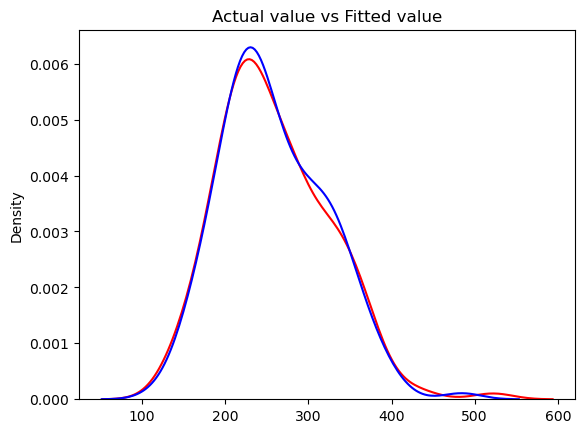

In [61]:
ax2 = sn.distplot(y_test, hist = False, color = 'r', label = "Actual Vlues")
sn.distplot(yhat1, hist=False, color="b", label="Fitted", ax = ax2)
plt.title("Actual value vs Fitted value")

From the two we can see that the Red Curve which represent the actual values are similar in level with the fitted values which the Blue Curve. This suggest that the multipl linear regression model is good to predict CO2 Emission than the simple linear regression model.